## Importação dos pacotes

In [1]:
# importar pacotes necessários
import numpy as np
import pandas as pd

In [2]:
# definir parâmetros extras
pd.set_option('precision', 4)
pd.set_option('display.max_columns', 100)

import warnings
warnings.filterwarnings("ignore")

## Carga dos dados

In [3]:
prefixo_arquivos = ''
#prefixo_arquivos = 'https://github.com/hjort/ai-labs/raw/master/kaggle/serpro-wine/'

In [4]:
# carregar arquivo de dados de treino
arquivo_treino = 'wine-train-without-outliers.csv'
#arquivo_treino = 'wine-train.csv'
train_data = pd.read_csv(prefixo_arquivos + arquivo_treino, index_col='wine')
train_data.shape

(3231, 12)

In [5]:
# carregar arquivo de dados de teste
test_data = pd.read_csv(prefixo_arquivos + 'wine-test.csv', index_col='wine')
test_data.shape

(1633, 11)

In [6]:
# unir ambos os dados de treino e teste
data = pd.concat([train_data, test_data])
print(data.shape)

# mostrar alguns exemplos de registros
data.head()

(4864, 12)


,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,ph,quality,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
wine,,,,,,,,,,,,
2169,9.1,0.053,0.30,0.9986,7.4,48.5,3.14,good,12.8,0.49,229.0,0.19
1382,9.1,0.045,0.16,0.9940,6.6,28.0,3.12,bad,3.1,0.35,92.0,0.56
3346,10.6,0.057,0.24,0.9952,6.7,64.0,3.12,bad,10.3,0.50,185.0,0.18
3308,10.6,0.039,0.28,0.9954,6.4,19.0,3.20,bad,12.6,0.43,124.0,0.35
3167,12.1,0.034,0.40,0.9914,5.6,36.0,3.21,good,6.1,0.43,118.0,0.28


## Transformações nos dados

In [7]:
# categorizar os valores dos sexos
data['quality'].fillna('unknown', inplace=True)
data['quality'] = data['quality'].map({'good': 1, 'bad': 0, 'unknown': -1}).astype(int)

In [8]:
data.head()

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,ph,quality,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
wine,,,,,,,,,,,,
2169,9.1,0.053,0.30,0.9986,7.4,48.5,3.14,1,12.8,0.49,229.0,0.19
1382,9.1,0.045,0.16,0.9940,6.6,28.0,3.12,0,3.1,0.35,92.0,0.56
3346,10.6,0.057,0.24,0.9952,6.7,64.0,3.12,0,10.3,0.50,185.0,0.18
3308,10.6,0.039,0.28,0.9954,6.4,19.0,3.20,0,12.6,0.43,124.0,0.35
3167,12.1,0.034,0.40,0.9914,5.6,36.0,3.21,1,6.1,0.43,118.0,0.28


In [9]:
data.columns.values

array(['alcohol', 'chlorides', 'citric_acid', 'density', 'fixed_acidity',
       'free_sulfur_dioxide', 'ph', 'quality', 'residual_sugar',
       'sulphates', 'total_sulfur_dioxide', 'volatile_acidity'],
      dtype=object)

In [10]:
# realizar normalização nos dados numéricos contínuos
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler)

cols = ['alcohol', 'chlorides', 'citric_acid', 'density', 'fixed_acidity', 'free_sulfur_dioxide',
        'ph', 'residual_sugar', 'sulphates', 'total_sulfur_dioxide', 'volatile_acidity']

#for col in cols:
data.loc[:,cols] = scaler.fit_transform(data.loc[:,cols])

MinMaxScaler(copy=True, feature_range=(0, 1))


In [11]:
data.head()

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,ph,quality,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
wine,,,,,,,,,,,,
2169,0.1774,0.1679,0.2439,0.2215,0.4500,0.3407,0.3818,1,0.1871,0.3140,0.7719,0.1243
1382,0.1774,0.1374,0.1301,0.1328,0.3500,0.1905,0.3636,0,0.0383,0.1512,0.2912,0.5424
3346,0.4194,0.1832,0.1951,0.1558,0.3625,0.4542,0.3636,0,0.1488,0.3256,0.6175,0.1130
3308,0.4194,0.1145,0.2276,0.1596,0.3250,0.1245,0.4364,0,0.1840,0.2442,0.4035,0.3051
3167,0.6613,0.0954,0.3252,0.0835,0.2250,0.2491,0.4455,1,0.0844,0.2442,0.3825,0.2260


## Modelagem preditiva

In [12]:
# importar os pacotes necessários para os algoritmos de classificação
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [47]:
from datetime import datetime
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# avalia o desempenho do modelo, retornando o valor da precisão
def evaluate_classification_model(model, X, y):
    start = datetime.now()
    kfold = KFold(n_splits=10, random_state=42)
    results = cross_val_score(model, X, y, cv=kfold, scoring='f1', verbose=1, n_jobs=2)
    end = datetime.now()
    elapsed = int((end - start).total_seconds() * 1000)
    score = 100.0 * results.mean()
    stddev = 100.0 * results.std()
    print(model, '\nScore: %.2f (+/- %.2f) [%5s ms]' % (score, stddev, elapsed))
    return score, stddev, elapsed

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# faz o ajuste fino do modelo, calculando os melhores hiperparâmetros
def fine_tune_model(model, params, X, y):
    print('\nFine Tuning Model:')
    print(model, "\nparams:", params)
    kfold = KFold(n_splits=10, random_state=42)
    grid = GridSearchCV(estimator=model, param_grid=params, scoring='f1', cv=kfold, verbose=1, n_jobs=2)
    grid.fit(X, y)
    print('\nGrid Best Score: %.2f' % (grid.best_score_ * 100.0))
    print('Best Params:', grid.best_params_)
    return grid

In [49]:
# definir dados de treino
train_data = data[data.quality >= 0]

# selecionar atributos para o modelo
cols = ['alcohol', 'chlorides', 'citric_acid', 'density', 'fixed_acidity', 'free_sulfur_dioxide',
        'ph', 'residual_sugar', 'sulphates', 'total_sulfur_dioxide', 'volatile_acidity']

X_train = train_data[cols]
y_train = train_data['quality']

print('Forma dos dados de treino:', X_train.shape, y_train.shape)

Forma dos dados de treino: (3231, 11) (3231,)


In [50]:
train_data.corr()

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,ph,quality,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
alcohol,1.0000,-0.3867,-0.0543,-0.8100,-0.1327,-0.2312,0.1263,0.3878,-0.4650,-0.0225,-0.4546,0.0630
chlorides,-0.3867,1.0000,0.0842,0.2825,0.0159,0.1126,-0.0916,-0.1954,0.1055,0.0138,0.2066,0.0601
citric_acid,-0.0543,0.0842,1.0000,0.1336,0.2855,0.0995,-0.1653,-0.0208,0.0810,0.0892,0.1131,-0.1646
density,-0.8100,0.2825,0.1336,1.0000,0.2801,0.3017,-0.1009,-0.2884,0.8306,0.0696,0.5473,-0.0064
fixed_acidity,-0.1327,0.0159,0.2855,0.2801,1.0000,-0.0359,-0.4315,-0.0701,0.0906,-0.0260,0.1041,-0.0396
free_sulfur_dioxide,-0.2312,0.1126,0.0995,0.3017,-0.0359,1.0000,-0.0108,-0.0171,0.3137,0.0613,0.6006,-0.1050
ph,0.1263,-0.0916,-0.1653,-0.1009,-0.4315,-0.0108,1.0000,0.0926,-0.1929,0.1604,-0.0094,-0.0303
quality,0.3878,-0.1954,-0.0208,-0.2884,-0.0701,-0.0171,0.0926,1.0000,-0.1169,0.0416,-0.1581,-0.0661
residual_sugar,-0.4650,0.1055,0.0810,0.8306,0.0906,0.3137,-0.1929,-0.1169,1.0000,-0.0329,0.4120,0.0424
sulphates,-0.0225,0.0138,0.0892,0.0696,-0.0260,0.0613,0.1604,0.0416,-0.0329,1.0000,0.1303,-0.0428


In [51]:
# definir dados de teste
test_data = data[data.quality < 0]

X_test = test_data[cols]

print('Forma dos dados de teste:', X_test.shape)

Forma dos dados de teste: (1633, 11)


In [84]:
names = []
models = []
scores = []
stddevs = []
times = []

def add_model_info(name, model, score, stddev, elapsed):
    names.append(name)
    models.append((name, model))
    scores.append(score)
    stddevs.append(stddev)
    times.append(elapsed)

## Avaliação e ajuste fino de cada modelo preditivo

-  https://scikit-learn.org/stable/modules/classes.html

### Generalized Linear Models

In [85]:
#model = LogisticRegression(random_state=42, solver='newton-cg', C=0.1, multi_class='auto', max_iter=500)
model = LogisticRegression(random_state=42, solver='newton-cg', C=1000, multi_class='auto', max_iter=500)

params = dict(
    solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    C=np.logspace(-3, 3, 7)
)
#fine_tune_model(model, params, X_train, y_train)

score, stddev, elapsed = evaluate_classification_model(model, X_train, y_train)
add_model_info('LR', model, score, stddev, elapsed)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False) 
Score: 39.51 (+/- 4.27) [ 4308 ms]


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    4.3s finished


### Decision Trees

In [86]:
model = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=6, min_samples_split=0.25)

#criterion=’mse’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, 
#min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, 
#min_impurity_decrease=0.0, min_impurity_split=None, presort=False

params = dict(
    criterion=['gini','entropy'],
    max_depth=[4, 6, 8, 12],
    min_samples_split=[0.25, 0.5, 0.75, 1.0]
)
#fine_tune_model(model, params, X_train, y_train)

score, stddev, elapsed = evaluate_classification_model(model, X_train, y_train)
add_model_info('DT', model, score, stddev, elapsed)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=0.25,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best') 
Score: 36.10 (+/- 8.69) [ 1159 ms]


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    1.2s finished


### Discriminant Analysis

In [87]:
#model = LinearDiscriminantAnalysis(solver='lsqr')
model = LinearDiscriminantAnalysis(solver='svd')

#solver=’svd’, shrinkage=None, priors=None,
#n_components=None, store_covariance=False, tol=0.0001

params = dict(
    solver=['svd', 'lsqr'] #, 'eigen']
)
#fine_tune_model(model, params, X_train, y_train)

score, stddev, elapsed = evaluate_classification_model(model, X_train, y_train)
add_model_info('LDA', model, score, stddev, elapsed)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001) 
Score: 42.09 (+/- 4.81) [ 1060 ms]


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    1.1s finished


### Naïve Bayes

In [88]:
#model = GaussianNB(priors=None, var_smoothing=1e-8)
model = GaussianNB(priors=None, var_smoothing=1e-4)

#priors=None, var_smoothing=1e-09

params = dict(
    priors=[None],
    var_smoothing=[1e-8, 1e-7, 1e-6, 1e-5, 1e-4]
)
#fine_tune_model(model, params, X_train, y_train)

score, stddev, elapsed = evaluate_classification_model(model, X_train, y_train)
add_model_info('NB', model, score, stddev, elapsed)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


GaussianNB(priors=None, var_smoothing=0.0001) 
Score: 52.95 (+/- 3.07) [  616 ms]


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.6s finished


### Nearest Neighbors

In [89]:
#model = KNeighborsClassifier(n_neighbors=11, weights='uniform')
model = KNeighborsClassifier(n_neighbors=13, weights='distance')

#n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, metric=’minkowski’,
#metric_params=None, n_jobs=None

params = dict(
    n_neighbors=[1, 3, 5, 7, 9, 11, 13],
    weights=['uniform', 'distance']
)
#fine_tune_model(model, params, X_train, y_train)

score, stddev, elapsed = evaluate_classification_model(model, X_train, y_train)
add_model_info('KNN', model, score, stddev, elapsed)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='distance') 
Score: 63.75 (+/- 5.05) [ 2129 ms]


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    2.1s finished


### Support Vector Machines

In [90]:
#model = SVC(random_state=42, C=10, gamma=0.1, kernel='rbf')
model = SVC(random_state=42, C=100, gamma=10, kernel='rbf')

#kernel=’rbf’, degree=3, gamma=’auto_deprecated’, coef0=0.0, tol=0.001, C=1.0, 
#epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1

params = dict(
    C=[0.1, 1, 10, 100],
    gamma=[0.01, 0.1, 1, 10],
    kernel=['linear', 'rbf']
)
#fine_tune_model(model, params, X_train, y_train)

score, stddev, elapsed = evaluate_classification_model(model, X_train, y_train)
add_model_info('SVM', model, score, stddev, elapsed)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False) 
Score: 61.17 (+/- 3.77) [37275 ms]


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   37.3s finished


### Neural network models

In [91]:
#model = MLPClassifier(random_state=42, solver='lbfgs', alpha=1, hidden_layer_sizes=(100,), activation='logistic')
model = MLPClassifier(random_state=42, solver='lbfgs', alpha=1, hidden_layer_sizes=(50,2), activation='logistic')
                
#hidden_layer_sizes=(100, ), activation=’relu’, solver=’adam’, alpha=0.0001, batch_size=’auto’, 
#learning_rate=’constant’, learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, 
#random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, 
#early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10

params = dict(
    alpha=[1, 0.1, 0.001],
    hidden_layer_sizes=[(100,), (50,), (50,2), (5,5,2), (10,5,2)],
    activation=['identity', 'logistic', 'tanh', 'relu'],
    solver=['lbfgs', 'sgd', 'adam']
)
#fine_tune_model(model, params, X_train, y_train)

score, stddev, elapsed = evaluate_classification_model(model, X_train, y_train)
add_model_info('MLP', model, score, stddev, elapsed)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


MLPClassifier(activation='logistic', alpha=1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False) 
Score: 39.38 (+/- 5.00) [43726 ms]


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   43.7s finished


### Ensemble Methods

In [92]:
#model = AdaBoostClassifier(DecisionTreeClassifier(random_state=42), random_state=42, n_estimators=50)
model = AdaBoostClassifier(DecisionTreeClassifier(random_state=42), random_state=42, n_estimators=10)

#base_estimator=None, n_estimators=50, learning_rate=1.0,
#algorithm=’SAMME.R’, random_state=None

params = dict(
    n_estimators=[10, 25, 50, 100]
)
#fine_tune_model(model, params, X_train, y_train)

score, stddev, elapsed = evaluate_classification_model(model, X_train, y_train)
add_model_info('ABDT', model, score, stddev, elapsed)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=42,
                            

[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    1.7s finished


In [93]:
#model = BaggingClassifier(random_state=42, n_estimators=100, max_samples=0.25, max_features=0.8)
model = BaggingClassifier(random_state=42, n_estimators=100, max_samples=0.75, max_features=1.0)

#base_estimator=None, n_estimators=10, max_samples=1.0, max_features=1.0,
#bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,
#n_jobs=None, random_state=None, verbose=0

params = dict(
    n_estimators=[50, 100],
    max_samples=[0.75, 1.0],
    max_features=[0.8, 0.9, 1.0]
)
#fine_tune_model(model, params, X_train, y_train)

score, stddev, elapsed = evaluate_classification_model(model, X_train, y_train)
add_model_info('BC', model, score, stddev, elapsed)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=0.75, n_estimators=100,
                  n_jobs=None, oob_score=False, random_state=42, verbose=0,
                  warm_start=False) 
Score: 64.94 (+/- 4.51) [46254 ms]


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   46.2s finished


In [94]:
#model = ExtraTreesClassifier(random_state=42, n_estimators=100, max_depth=7, in_samples_split=0.25, max_features='auto')
model = ExtraTreesClassifier(random_state=42, n_estimators=100, max_depth=None, min_samples_split=0.25, max_features=1.0)

#n_estimators=’warn’, criterion=’gini’, max_depth=None, min_samples_split=2,
#min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, 
#max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, 
#bootstrap=False, oob_score=False, n_jobs=None, random_state=None, verbose=0,
#warm_start=False, class_weight=None

params = dict(
    n_estimators=[50, 100],
    max_depth=[None, 3, 7, 11],
    min_samples_split=[0.25, 0.5],
    max_features=['auto', 0.85, 1.0]
)
#fine_tune_model(model, params, X_train, y_train)

score, stddev, elapsed = evaluate_classification_model(model, X_train, y_train)
add_model_info('ET', model, score, stddev, elapsed)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features=1.0, max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=0.25,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=42, verbose=0,
                     warm_start=False) 
Score: 30.26 (+/- 4.30) [ 9956 ms]


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   10.0s finished


In [95]:
model = GradientBoostingClassifier(random_state=42, n_estimators=100, max_features=0.75,
                                   max_depth=4, learning_rate=0.1, subsample=0.6)

#loss=’ls’, learning_rate=0.1, n_estimators=100, subsample=1.0, criterion=’friedman_mse’, min_samples_split=2,
#min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, 
#min_impurity_split=None, init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, 
#max_leaf_nodes=None, warm_start=False, presort=’auto’, validation_fraction=0.1, n_iter_no_change=None, 
#tol=0.0001

params = dict(
    n_estimators=[100, 250, 500],
    max_features=[0.85, 1.0],
    max_depth=[3, 7, 11],
    learning_rate=[0.05, 0.1, 0.15],
    subsample=[0.4, 0.6, 0.8]
)
#fine_tune_model(model, params, X_train, y_train)

score, stddev, elapsed = evaluate_classification_model(model, X_train, y_train)
add_model_info('GB', model, score, stddev, elapsed)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=4,
                           max_features=0.75, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=0.6, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) 
Score: 58.91 (+/- 3.89) [14003 ms]


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   14.0s finished


In [96]:
model = RandomForestClassifier(random_state=42, n_estimators=100, max_features='auto', max_depth=5)

#n_estimators=’warn’, criterion=’mse’, max_depth=None, min_samples_split=2, min_samples_leaf=1, 
#min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
#min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, 
#verbose=0, warm_start=False

params = dict(
    n_estimators=[10, 50, 100, 500],
    max_features=['auto', 'sqrt', 'log2'],
    max_depth=[None, 3, 5, 7, 9, 11, 13]
)
#fine_tune_model(model, params, X_train, y_train)

score, stddev, elapsed = evaluate_classification_model(model, X_train, y_train)
add_model_info('RF', model, score, stddev, elapsed)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False) 
Score: 44.43 (+/- 6.34) [13538 ms]


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   13.5s finished


### Outros algoritmos

#### XGBoost

- https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn

In [31]:
model = XGBClassifier(max_depth=3, n_estimators=100)

#max_depth=3, learning_rate=0.1, n_estimators=100, verbosity=1, silent=None, objective='reg:squarederror',
#booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, 
#colsample_bytree=1, colsample_bylevel=1, colsample_bynode=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, 
#base_score=0.5, random_state=0, seed=None, missing=None, importance_type='gain'

params = dict(
    max_depth=[3, 5, 7, 9],
    n_estimators=[50, 75, 100, 200]
)
#fine_tune_model(model, params, X_train, y_train)

score, stddev, elapsed = evaluate_classification_model(model, X_train, y_train)
add_model_info('XGB', model, score, stddev, elapsed)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1) 
Score: 53.16 (+/- 7.06) [14930 ms]


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   14.9s finished


#### LightGBM

- https://github.com/microsoft/LightGBM
- https://lightgbm.readthedocs.io/en/latest/
- https://medium.com/@pushkarmandot/https-medium-com-pushkarmandot-what-is-lightgbm-how-to-implement-it-how-to-fine-tune-the-parameters-60347819b7fc

### Ensemble Learning Model

- https://towardsdatascience.com/automate-stacking-in-python-fc3e7834772e
- https://github.com/vecxoz/vecstack

In [32]:
estimators =  [
    ('RF', RandomForestClassifier(random_state=42, n_estimators=100, max_features='auto', max_depth=5)),
    ('BC', BaggingClassifier(random_state=42, n_estimators=100, max_samples=0.25, max_features=0.8)),
    ('GB', GradientBoostingClassifier(random_state=42, max_depth=4, max_features=0.75,
                                   n_estimators=100, learning_rate=0.1, subsample=0.6)),
#    ('XGB', XGBClassifier(max_depth=3, n_estimators=100)),
]
model = VotingClassifier(estimators, n_jobs=-1, weights=(2,1,1))

#estimators, weights=None, n_jobs=None

params = dict(
    weights=[(1,1,1), (2,1,1), (3,1,1), (3,2,1), (2,2,1), (2,1,2), (5,4,3), (1,2,1), (1,1,2), ]
)
#fine_tune_model(model, params, X_train, y_train)

score, stddev, elapsed = evaluate_classification_model(model, X_train, y_train)
add_model_info('VC', model, score, stddev, elapsed)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


VotingClassifier(estimators=[('RF',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=5,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators=100,
                                                     n_jobs=None,
             

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.4min finished


## Avaliar importância dos atributos no modelo

In [33]:
model = RandomForestClassifier(random_state=42, max_features='auto', n_estimators=100)
model.fit(X_train, y_train)

importances = pd.DataFrame({'feature': X_train.columns,
                            'importance': np.round(model.feature_importances_, 3)})
importances = importances.sort_values('importance', ascending=False).set_index('feature')
importances.head(20)

,importance
feature,
alcohol,0.148
density,0.131
residual_sugar,0.094
free_sulfur_dioxide,0.087
ph,0.087
volatile_acidity,0.087
chlorides,0.085
total_sulfur_dioxide,0.082
sulphates,0.070


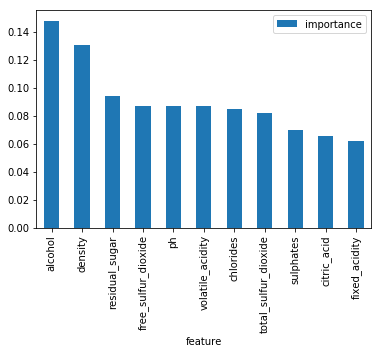

In [35]:
importances.plot.bar()

## Comparação final entre os algoritmos

In [97]:
results = pd.DataFrame({'Algorithm': names, 'Score': scores, 'Std Dev': stddevs, 'Time (ms)': times})
results.sort_values(by='Score', ascending=False)

,Algorithm,Score,Std Dev,Time (ms)
8,BC,64.9426,4.5103,46254
4,KNN,63.7483,5.0523,2129
5,SVM,61.1704,3.7743,37275
10,GB,58.9121,3.8876,14003
7,ABDT,58.2080,3.1535,1705
3,NB,52.9549,3.0723,616
11,RF,44.4279,6.3359,13538
2,LDA,42.0853,4.8150,1060
0,LR,39.5099,4.2683,4308
6,MLP,39.3788,5.0025,43726


## Gerar arquivos com resultados

In [98]:
# criar diretório para os arquivos de envio
!test -d submissions || mkdir submissions

In [99]:
prefixo_arquivo = 'submissions/wine-submission'
sufixo_arquivo = '20set'

for name, model in models:
    print(model, '\n')
    
    # treinar o modelo
    model.fit(X_train, y_train)
    
    # executar previsão usando o modelo
    y_pred = model.predict(X_test)
    vfunc = np.vectorize(lambda x: 'good' if x > 0 else 'bad')

    # gerar dados de envio (submissão)
    submission = pd.DataFrame({
      'wine': X_test.index,
      'quality': vfunc(y_pred)
    })
    submission.set_index('wine', inplace=True)

    # gerar arquivo CSV para o envio
    filename = '%s-p-%s-%s.csv' % (prefixo_arquivo, sufixo_arquivo, name.lower())
    submission.to_csv(filename)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False) 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=0.25,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best') 

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001) 

GaussianNB(priors=None, var_smoothing=0.0001) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric

In [39]:
!head submissions/*.csv

==> submissions/wine-submission-p-18ago-abdt.csv <==
wine,quality
1214,bad
727,bad
481,bad
1308,bad
4087,bad
619,bad
4669,bad
874,bad
2337,bad

==> submissions/wine-submission-p-18ago-bc.csv <==
wine,quality
1214,bad
727,bad
481,bad
1308,bad
4087,bad
619,bad
4669,bad
874,bad
2337,bad

==> submissions/wine-submission-p-18ago-dt.csv <==
wine,quality
1214,bad
727,bad
481,bad
1308,bad
4087,bad
619,bad
4669,bad
874,bad
2337,bad

==> submissions/wine-submission-p-18ago-et.csv <==
wine,quality
1214,bad
727,bad
481,bad
1308,bad
4087,bad
619,bad
4669,bad
874,bad
2337,bad

==> submissions/wine-submission-p-18ago-gb.csv <==
wine,quality
1214,bad
727,bad
481,bad
1308,bad
4087,bad
619,bad
4669,bad
874,bad
2337,bad

==> submissions/wine-submission-p-18ago-knn.csv <==
wine,quality
1214,bad
727,bad
481,bad
1308,bad
4087,bad
619,bad
4669,bad
874,bad
2337,bad

==> submissions/wine-submission-p-18ago-lda.csv <==
wine,quality
1214,bad
727,bad
481,bad
1308,bad
4087,bad
619,bad
4669,bad
874,bad
2337,bad

==